In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")


In [3]:
df


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
# we have 43000 plus data so we can drop the null values rather than filling them
df.dropna(inplace=True)

In [7]:
df.reset_index(inplace=True)

In [8]:
df

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41752,43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
41753,43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
41754,43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
41755,43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [9]:
df_copy = df.drop(['index','No','year','month','day','hour','Is','Ir'],axis=1)


In [10]:
df_copy


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,129.0,-16,-4.0,1020.0,SE,1.79
1,148.0,-15,-4.0,1020.0,SE,2.68
2,159.0,-11,-5.0,1021.0,SE,3.57
3,181.0,-7,-5.0,1022.0,SE,5.36
4,138.0,-7,-5.0,1022.0,SE,6.25
...,...,...,...,...,...,...
41752,8.0,-23,-2.0,1034.0,NW,231.97
41753,10.0,-22,-3.0,1034.0,NW,237.78
41754,10.0,-22,-3.0,1034.0,NW,242.70
41755,8.0,-22,-4.0,1034.0,NW,246.72


In [11]:
df_copy['cbwd'].value_counts()


SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df_copy['cbwd'] = encoder.fit_transform(df_copy['cbwd'])

In [14]:
df_copy

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,129.0,-16,-4.0,1020.0,2,1.79
1,148.0,-15,-4.0,1020.0,2,2.68
2,159.0,-11,-5.0,1021.0,2,3.57
3,181.0,-7,-5.0,1022.0,2,5.36
4,138.0,-7,-5.0,1022.0,2,6.25
...,...,...,...,...,...,...
41752,8.0,-23,-2.0,1034.0,1,231.97
41753,10.0,-22,-3.0,1034.0,1,237.78
41754,10.0,-22,-3.0,1034.0,1,242.70
41755,8.0,-22,-4.0,1034.0,1,246.72


In [15]:
df_copy['cbwd'].value_counts()

2    14573
1    13484
3     8944
0     4756
Name: cbwd, dtype: int64

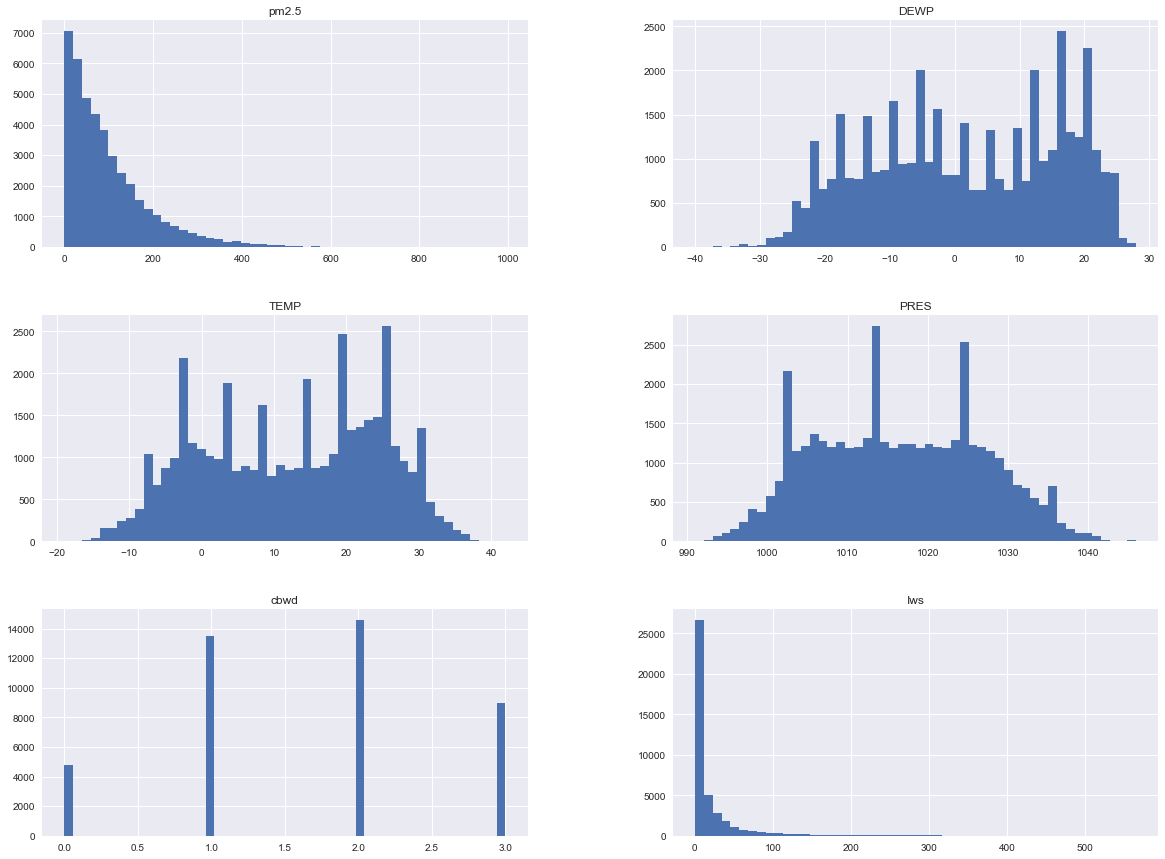

In [16]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
# correlation -->
df_copy.corr()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
pm2.5,1.000000,0.171423,-0.090534,-0.047282,0.197150,-0.247784
DEWP,0.171423,1.000000,0.823821,-0.777722,0.232838,-0.293106
TEMP,-0.090534,0.823821,1.000000,-0.826903,0.175498,-0.149613
PRES,-0.047282,-0.777722,-0.826903,1.000000,-0.167989,0.178871
cbwd,0.197150,0.232838,0.175498,-0.167989,1.000000,-0.200870
Iws,-0.247784,-0.293106,-0.149613,0.178871,-0.200870,1.000000


<AxesSubplot:>

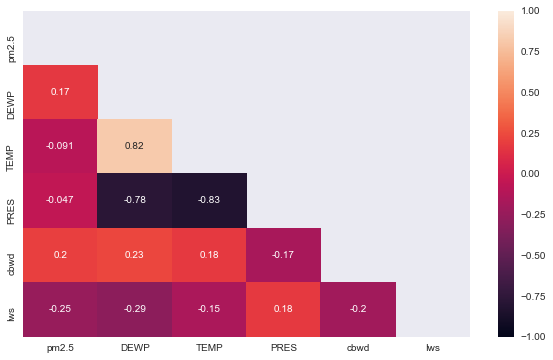

In [18]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(df_copy.corr(), dtype=bool))
sns.heatmap(df_copy.corr(), annot=True, mask=mask,vmin=-1,vmax=1)

In [19]:
x = df_copy.iloc[:,:].drop(['pm2.5'],axis=1)
y = df_copy.iloc[:,0]

In [20]:
x

,DEWP,TEMP,PRES,cbwd,Iws
0,-16,-4.0,1020.0,2,1.79
1,-15,-4.0,1020.0,2,2.68
2,-11,-5.0,1021.0,2,3.57
3,-7,-5.0,1022.0,2,5.36
4,-7,-5.0,1022.0,2,6.25
...,...,...,...,...,...
41752,-23,-2.0,1034.0,1,231.97
41753,-22,-3.0,1034.0,1,237.78
41754,-22,-3.0,1034.0,1,242.70
41755,-22,-4.0,1034.0,1,246.72


In [21]:
y

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.33)

In [23]:
x_train,x_test,y_train,y_test

(       DEWP  TEMP    PRES  cbwd     Iws
 30727    18  20.0  1013.0     1    0.89
 290     -20 -15.0  1025.0     1    0.89
 41755   -22  -4.0  1034.0     1  246.72
 14104     3   6.0  1030.0     1   19.67
 19592     9  18.0  1016.0     0    8.94
 ...     ...   ...     ...   ...     ...
 6265     -1  20.0  1018.0     1   54.53
 11284     3  21.0  1003.0     1    8.04
 38158    22  32.0  1006.0     2    1.79
 860     -13   4.0  1023.0     2    1.79
 15795   -18  -6.0  1035.0     0   17.88
 
 [27977 rows x 5 columns],
        DEWP  TEMP    PRES  cbwd     Iws
 25229    -7  -7.0  1020.0     1   16.10
 33886   -31  -2.0  1027.0     1   13.86
 26204     3  10.0  1020.0     2   29.05
 27348     4  21.0  1015.0     2   12.96
 32149   -12  11.0  1024.0     3    2.68
 ...     ...   ...     ...   ...     ...
 474     -20  -2.0  1034.0     1   15.65
 24017   -16  -4.0  1027.0     0    4.92
 7007     -4  -1.0  1023.0     1  291.62
 18455     8  21.0  1006.0     2   78.24
 14493     3   9.0  1024.0  

# Feature Scaling or standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_test_scaled

array([[-0.60237403, -1.59156653,  0.344509  , -0.71025646, -0.15544821],
       [-2.26737831, -1.18063471,  1.02420244, -0.71025646, -0.20075546],
       [ 0.09137775, -0.19439835,  0.344509  ,  0.35446223,  0.10648432],
       ...,
       [-0.3942485 , -1.09844835,  0.63580619, -0.71025646,  5.41734346],
       [ 0.43825364,  0.70965165, -1.0148779 ,  0.35446223,  1.10142343],
       [ 0.09137775, -0.27658471,  0.73290525, -1.77497516, -0.21895927]])

# Box Plot to understand Effect of Standard Scaler

Text(0.5, 1.0, 'x_train after scaling')

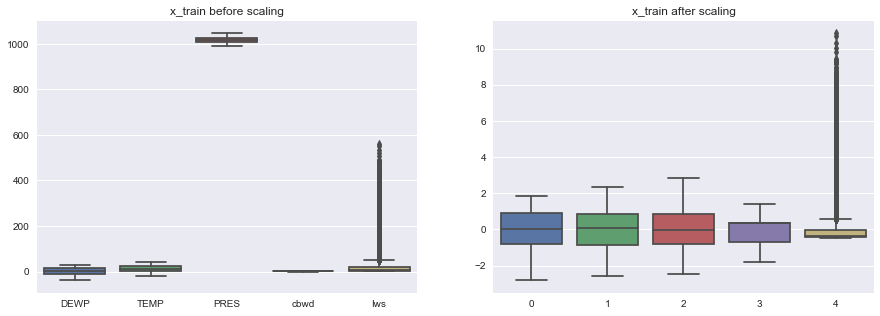

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_trained_scaled)
plt.title('x_train after scaling')

# Ridge Regressor Model

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_trained_scaled,y_train)
y_pred_train_ridge = ridge.predict(x_trained_scaled)
y_pred_ridge = ridge.predict(x_test_scaled)

In [28]:
y_pred_train_ridge, y_pred_ridge

(array([120.37886253, 157.63861822,  13.89440491, ...,  88.63471759,
         89.95216554,  82.10184069]),
 array([165.66337732,  32.39863912, 115.82304845, ...,  72.0723062 ,
         79.07577029,  94.11056011]))

# Random Forest Regressor Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
rfr_model.fit(x_trained_scaled,y_train)
y_pred_train_rfr = rfr_model.predict(x_trained_scaled)
y_pred_rfr = rfr_model.predict(x_test_scaled)
y_pred_train_rfr , y_pred_rfr

(array([174.40333333, 147.24      ,   9.99      , ..., 103.99      ,
         60.41666667,  24.88      ]),
 array([227.8 ,  22.89, 176.09, ..., 126.11,  55.39,  55.5 ]))

# Model Evaluation


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

# Ridge Regressor Model Evaluation

In [32]:
# for training data -
MSE_train = mean_squared_error(y_pred_train_ridge,y_train)
MAE_train = mean_absolute_error(y_pred_train_ridge,y_train)
RMSE_train = np.sqrt(MSE_train)
score_train = r2_score(y_train,y_pred_train_ridge)
print(MSE_train,MAE_train,RMSE_train,score_train)

6392.434036011941 58.04111629336734 79.9526987412679 0.2430129281093697


In [33]:
# for testing data - 
MSE_test = mean_squared_error(y_pred_ridge,y_test)
MAE_test = mean_absolute_error(y_pred_ridge,y_test)
RMSE_test = np.sqrt(MSE_test)
score_test = r2_score(y_test,y_pred_ridge)
print(MSE_test,MAE_test,RMSE_test,score_test)

6502.983442878626 58.16319737423287 80.64107788762887 0.23771026982485077


# Random Forest Regressor Model Evaluation

In [34]:
# for training data -
MSE_train_RFR = mean_squared_error(y_pred_train_rfr,y_train)
MAE_train_RFR = mean_absolute_error(y_pred_train_rfr,y_train)
RMSE_train_RFR = np.sqrt(MSE_train_RFR)
score_train_RFR = r2_score(y_train,y_pred_train_rfr)
print(MSE_train_RFR,MAE_train_RFR,RMSE_train_RFR,score_train_RFR)

809.458270542106 18.30014154809181 28.45098013324156 0.9041445805176271


In [35]:
# for testing data -
MSE_test_RFR = mean_squared_error(y_pred_rfr,y_test)
MAE_test_RFR = mean_absolute_error(y_pred_rfr,y_test)
RMSE_test_RFR = np.sqrt(MSE_test_RFR)
score_test_rfr = r2_score(y_test,y_pred_rfr)
print(MSE_test_RFR  , MAE_test_RFR , RMSE_test_RFR , score_test_rfr)

5235.079375605886 47.52797748009328 72.35384838145022 0.386335936462174


# CrossValidation -

In [36]:
# RIDGE REGRESSION - 
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0] 
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
clf_ridge = RandomizedSearchCV(ridge,param_distributions=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=3)

In [38]:
clf_ridge.fit(x_trained_scaled,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .....................................alpha=0.1; total time=   0.0s
[CV 2/10] END .....................................alpha=0.1; total time=   0.0s
[CV 3/10] END .....................................alpha=0.1; total time=   0.0s
[CV 4/10] END .....................................alpha=0.1; total time=   0.0s
[CV 5/10] END .....................................alpha=0.1; total time=   0.0s
[CV 6/10] END .....................................alpha=0.1; total time=   0.0s
[CV 7/10] END .....................................alpha=0.1; total time=   0.0s
[CV 8/10] END .....................................alpha=0.1; total time=   0.0s
[CV 9/10] END .....................................alpha=0.1; total time=   0.0s
[CV 10/10] END ....................................alpha=0.1; total time=   0.0s
[CV 1/10] END .....................................alpha=1.0; total time=   0.0s
[CV 2/10] END ..................................

C:\Users\Sourav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 6/10] END .....................................alpha=1.0; total time=   0.0s
[CV 7/10] END .....................................alpha=1.0; total time=   0.0s
[CV 8/10] END .....................................alpha=1.0; total time=   0.0s
[CV 9/10] END .....................................alpha=1.0; total time=   0.0s
[CV 10/10] END ....................................alpha=1.0; total time=   0.0s
[CV 1/10] END ....................................alpha=10.0; total time=   0.0s
[CV 2/10] END ....................................alpha=10.0; total time=   0.0s
[CV 3/10] END ....................................alpha=10.0; total time=   0.0s
[CV 4/10] END ....................................alpha=10.0; total time=   0.0s
[CV 5/10] END ....................................alpha=10.0; total time=   0.0s
[CV 6/10] END ....................................alpha=10.0; total time=   0.0s
[CV 7/10] END ....................................alpha=10.0; total time=   0.0s
[CV 8/10] END ..............

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]},
                   scoring='neg_mean_squared_error', verbose=3)

In [39]:
y_pred_ridge_clf = clf_ridge.predict(x_test_scaled)
y_pred_ridge_clf

array([165.66337732,  32.39863912, 115.82304845, ...,  72.0723062 ,
        79.07577029,  94.11056011])

In [40]:
# Evaluation - 
MSE_CV_RIDGE = mean_squared_error(y_pred_ridge_clf,y_test)
MAE_CV_RIDGE = mean_absolute_error(y_pred_ridge_clf,y_test)
RMSE_CV_RIDGE = np.sqrt(MSE_CV_RIDGE)
SCORE_CV_RIDGE = r2_score(y_test,y_pred_ridge_clf)
print('MSE_CV_RIDGE :',MSE_CV_RIDGE , 'MAE_CV_RIDGE :',MAE_CV_RIDGE , 'RMSE_CV_RIDGE :',RMSE_CV_RIDGE ,'SCORRE_CV_RIDGE :',SCORE_CV_RIDGE)

MSE_CV_RIDGE : 6502.983442878626 MAE_CV_RIDGE : 58.16319737423287 RMSE_CV_RIDGE : 80.64107788762887 SCORRE_CV_RIDGE : 0.23771026982485077


In [41]:
# Random forest classifier -- >

param_grid_rfc = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [42]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [43]:
clf_RFR = RandomizedSearchCV(RFR,param_distributions=param_grid_rfc,cv=10,scoring='accuracy')


In [44]:
import warnings
warnings.filterwarnings('ignore')
clf_RFR.fit(x_trained_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [45]:
y_pred_RFRcv = clf_RFR.predict(x_test_scaled)
y_pred_RFRcv

array([218.94252992,  21.6802485 , 121.11892842, ..., 131.32701217,
        81.51568464,  70.8074964 ])

In [46]:
# Evaluation - 
MSE_CV_RFR = mean_squared_error(y_pred_RFRcv,y_test)
MAE_CV_RFR = mean_absolute_error(y_pred_RFRcv,y_test)
RMSE_CV_RFR = np.sqrt(MSE_CV_RFR)
score_cv_rfr = r2_score(y_test,y_pred_RFRcv)
print("MSE_CV_RFR :",MSE_CV_RFR)
print("MAE_CV_RFR :",MAE_CV_RFR)
print("RMSE_CV_RFR :", RMSE_CV_RFR)
print("score_cv_rfr : ", score_cv_rfr)

MSE_CV_RFR : 5124.111490674006
MAE_CV_RFR : 48.469626174512165
RMSE_CV_RFR : 71.58289942908156
score_cv_rfr :  0.39934376276311034
